<a href="https://colab.research.google.com/github/Mayank0195/Capstone_Project_Zomato_Resturant_Clustering_and_Sentimental_Analysis/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

### **Attribute Information**

#### **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

###**Notebook Breakdown:**
* Business Problem Analysis
* Data Collection
* Data Cleaning and Preprocessing
* Feature Engineering
* Exploratory Data Analysis
    - Best Restaurants in the City
    - The Most Popular Cuisines in Hyderabad
    - Restaurants and their Costs
    - Cost-Benefit Analysis
    - Hypotheses Generation on visualized data for Clustering
* Restaurant Clustering
    - K means Clustering on Cost and Ratings
    - Multi-Dimensional K means Restaurant Clustering 
        -  Principal Component Analysis
        -  Silhouette Score
        -  K means Clustering
        -  Cluster Exploration
* Sentiment Analysis 
    -  Exploratory Data Analysis
        -  Critics in the Industry
    -  Text Pre-Processing and Text Visualization
    - Modeling
* Conclusion

###**Business Problem Analysis**

Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. With every state, you can find something different to love. Besides traditional North Indian and South Indian food, the food culture is heavily inspired by and evolved around various civilizations. To say that Indians are food lovers would be an understatement. 
The restaurant business in India has been booming and people even like to celebrate small occasions of their lives with good food and great ambiance. 
Here comes Zomato, connecting people and restaurants.
Zomato is an Indian restaurant aggregator which provides information, menus, and user reviews of restaurants, and also has food delivery options. They basically take orders on the restaurant's behalf and get the food delivered at the convenience of your doorstep.

The problem statement here has two datasets for us to work on:
* Zomato Restaurant Names and Metadata
* Zomato Restaurant Reviews

To assure Zomato's success it is important for the company to analyze its datasets and make appropriate strategic decisions. The problem statement here asks us to cluster the restaurants to help customers find the best restaurants in their city and according to their taste and understand the fields they are lagging in. This will help Zomato in building a good recommendation system for their customers. Do a cost-benefit analysis using the cuisines and costs of the restaurants.
In order to understand fields that need to be worked upon, it is important to do sentiment analysis to get an idea about how people really feel about a particular restaurant. To identify the industry critics and  especially work on their reviews to build a reputation worth praising.


In [1]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

# Set the display figure size using rcParams method 
sns.set(rc={'figure.figsize':(10,6)})
plt.rcParams['figure.figsize'] = [10,6]



## **1. Dataset Reading**

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading datasets
rest_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_ML_Unsupervised/Zomato Restaurant names and Metadata.csv")
reviews_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_ML_Unsupervised/Zomato Restaurant reviews.csv")

### **Checking the Head and Tail of the Metadata and Reviews**

In [4]:
rest_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
rest_df.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [6]:
#first five rows of reviews dataset
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [7]:
reviews_df.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


## **2. Dataset Discovery**

**dicovering the dataset and get a notion of what the attributes describe.**

In [8]:
rest_df.count()

Name           105
Links          105
Cost           105
Collections     51
Cuisines       105
Timings        104
dtype: int64

In [9]:
reviews_df.count()

Restaurant    10000
Reviewer       9962
Review         9955
Rating         9962
Metadata       9962
Time           9962
Pictures      10000
dtype: int64

In [10]:
rest_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [11]:
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [12]:
rest_df.shape

(105, 6)

In [13]:
reviews_df.shape

(10000, 7)

In [14]:
#restaurnts info - null count and dtypes 
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [15]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [16]:
rest_df.describe().transpose()

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [17]:
reviews_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


## **3.DATA CLEANING**

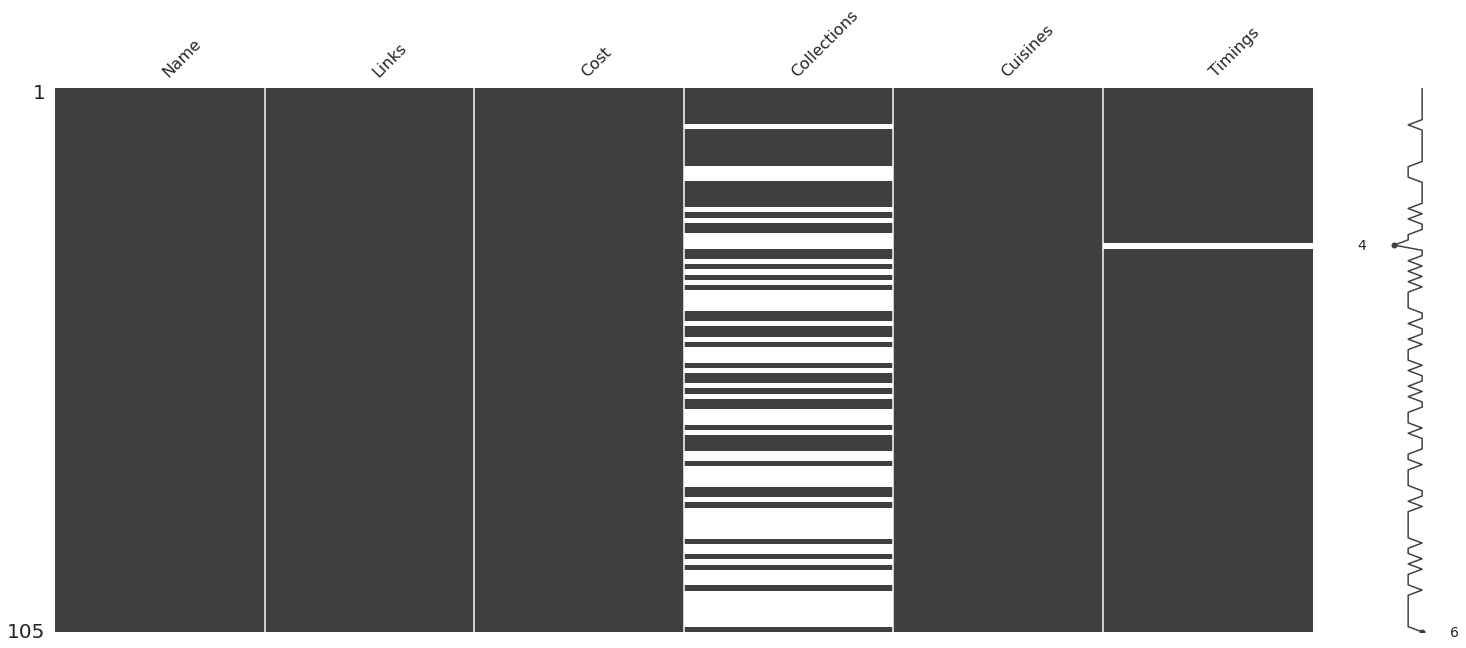

In [18]:
import missingno as msno
msno.matrix(rest_df)
plt.show()

In [19]:
# finding the count of null values
rest_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

**Around 50% of the data is missing in the categorical column "Collections", which are basically just tags given by zomato for better search results.**
**Even when imputed with various categorical data imputing measures, it would be pretty difficult to match similar tags as the restaurants and then even more difficult to then convert them into a meaningful numerical feature afterward.**

**If the information contained in the variable is not that high, it is better to drop the variable if it has 50% or more missing values.**

In [20]:
#drop collections
rest_df.drop('Collections', axis=1, inplace=True)

In [21]:
#Impute one missing timing row with the mode
rest_df['Timings'].fillna(rest_df['Timings'].mode()[0],inplace=True)

In [22]:
#check nulls
rest_df.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

In [23]:
rest_df.Cost.unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [24]:
# changing cost datatype
rest_df['Cost'] = rest_df['Cost'].str.replace(',','')
rest_df['Cost'] = rest_df['Cost'].astype('int')

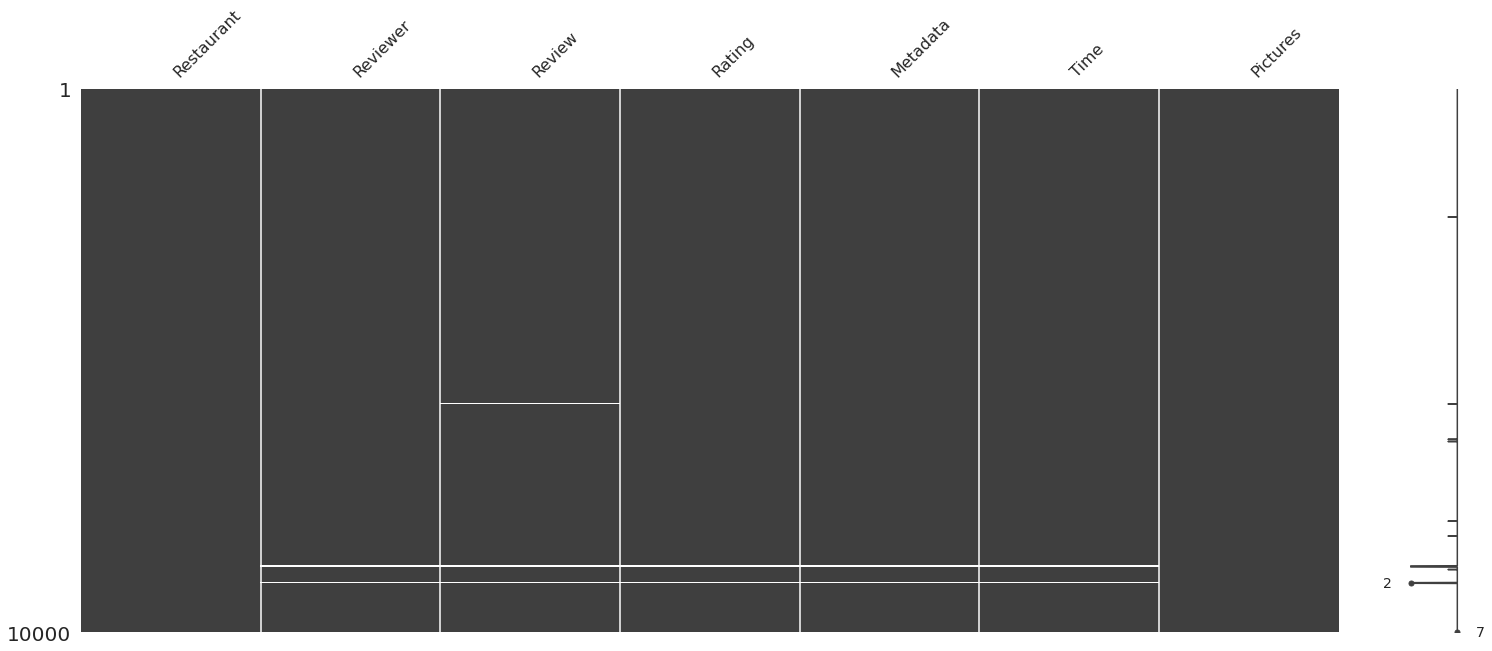

In [25]:
import missingno as msno
msno.matrix(reviews_df)
plt.show()

**The "Review" column has text that needs to be analyzed to understand the sentiments and without it, the analysis cannot be done. It can also be seen that most of the null values in the review column also have nulls in other corresponding columns such as Reviewer, Rating, Metadata, and Time. These instances should be dropped.**

In [26]:
# finding the count of null values
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [27]:
#dropping null rows in reviews first
reviews_df.dropna(subset = ["Review"], inplace=True)

In [28]:
# checking
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [29]:
#rating is in object type
reviews_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [30]:
#like should not be here
# correcting and changing the datatype
reviews_df['Rating'] = reviews_df['Rating'].replace('Like','4')
reviews_df['Rating'] = reviews_df['Rating'].astype('float')

###**Feature Engineering**

Feature engineering is the process of selecting, manipulating, and transforming raw data into meaningful numerical features that can be used by machine learning algorithms. 




####**Zomato Restaurant names and Metadata**

First, the restaurants dataset has columns such as Links, Cuisine, and Timings which aren't directly interpretable.
The location of the restaurant can be extracted by the Links column.
Cuisines can be clubbed and categorized into a few categories and a total number of cuisines served by a particular restaurant.
Timings can be categorized into thr

In [31]:
rest_df.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


**Links**

In [32]:
# link value
rest_df.loc[0,'Links']

'https://www.zomato.com/hyderabad/beyond-flavours-gachibowli'

In [33]:
#function to extract location of the restaurant
def location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
rest_df['Location'] = rest_df['Links'].apply(location)

In [34]:
# looks like the dataset consists of the restaurants in Hyderabad
rest_df['Location'].unique()

array(['hyderabad', 'thetiltbarrepublic'], dtype=object)

In [35]:
# exploring the other value
rest_df[rest_df.isin(['thetiltbarrepublic'])].stack()

68  Location    thetiltbarrepublic
dtype: object

In [36]:
#doesnt have location
rest_df.loc[68,:]

Name                            The Tilt Bar Republic
Links       https://www.zomato.com/thetiltbarrepublic
Cost                                             1500
Cuisines           North Indian, Continental, Italian
Timings                12noon to 12midnight (Mon-Sun)
Location                           thetiltbarrepublic
Name: 68, dtype: object

In [37]:
#dropping unnecessary columns
rest_df.drop(['Links','Location'],axis=1,inplace=True)

In [38]:
rest_df.columns

Index(['Name', 'Cost', 'Cuisines', 'Timings'], dtype='object')

In [39]:
#let's drop time as it would not be required
reviews_df.drop(['Time'],axis=1,inplace=True)

## **Cuisines**

Here, it can be seen that the various cuisines served by every restaurant are in the form of strings and it's important to categorize and create dummy variables for all the cuisines served.
The procedure followed in doing this is as follows:
* First, strings are split to get the cuisines in the list datatype.
* A frequency dictionary is created to understand the unique cuisines and the frequency in which the cuisine occurs.
* An attempt is made to the club and categorize various misspelled cuisines and get a minimized number of unique cuisines.
* Next, we need these cuisines in the one-hot encoded form. To get these a data frame is created with the unique cuisines as columns and if a particular restaurant has this cuisine available we get a positive.

In [40]:
#splitting to create list instead of strings
rest_df['Cuisines'] = rest_df['Cuisines'].apply(lambda x : x.split(','))

#creating a list of all cuisine lists for different restaurants
cuisine_list = []
for idx in rest_df.index:
  cuisine_list.append(rest_df['Cuisines'][idx])

#creating a flat list
cuisine_list = [item for sublist in cuisine_list for item in sublist]

In [41]:
#frequency dict
frequency_dict = {}
for elem in cuisine_list:
  if elem not in frequency_dict.keys():
    frequency_dict[elem] = cuisine_list.count(elem)
  else:
    pass

#frequency dictionary
frequency_dict

{' American': 2,
 ' Andhra': 3,
 ' Arabian': 1,
 ' Asian': 10,
 ' BBQ': 1,
 ' Bakery': 1,
 ' Beverages': 5,
 ' Biryani': 12,
 ' Burger': 3,
 ' Cafe': 1,
 ' Chinese': 36,
 ' Continental': 17,
 ' Desserts': 11,
 ' European': 2,
 ' Fast Food': 10,
 ' Finger Food': 1,
 ' Goan': 1,
 ' Hyderabadi': 3,
 ' Indonesian': 1,
 ' Italian': 12,
 ' Japanese': 2,
 ' Juices': 1,
 ' Kebab': 5,
 ' Malaysian': 1,
 ' Mediterranean': 4,
 ' Mithai': 1,
 ' Modern Indian': 1,
 ' Momos': 3,
 ' Mughlai': 5,
 ' North Indian': 28,
 ' Pizza': 1,
 ' Salad': 5,
 ' Seafood': 3,
 ' South Indian': 7,
 ' Spanish': 1,
 ' Sushi': 4,
 ' Thai': 2,
 ' Wraps': 1,
 'American': 4,
 'Andhra': 3,
 'Arabian': 1,
 'Asian': 5,
 'BBQ': 1,
 'Bakery': 6,
 'Biryani': 4,
 'Burger': 2,
 'Cafe': 5,
 'Chinese': 7,
 'Continental': 4,
 'Desserts': 2,
 'European': 2,
 'Fast Food': 5,
 'Finger Food': 1,
 'Healthy Food': 1,
 'Hyderabadi': 1,
 'Ice Cream': 2,
 'Italian': 2,
 'Kebab': 1,
 'Lebanese': 1,
 'Mediterranean': 1,
 'Mexican': 1,
 'Modern 

**It is observable that many of the cuisines are misspelled in terms of an extra space added at the beginning of the string. For example, there are two categories for North Indian food - 'North Indian' and ' North Indian'.**

**Another point to note is there are various unnecessary categories made. For example, there are 'Chinese' and ' Momos' both in the dataset as different cuisines. Let's try to club and correct them.**

In [42]:
#minimising the number of cuisines by sorting and categorizing them out
cuisine_dict = {'Chinese':['Chinese',' Chinese','Momos',' Momos'],'North Indian':['North Indian',' North Indian',' BBQ','BBQ',' Biryani','Biryani','Kebab',' Kebab'],'Continental':['Continental',' Continental',' American','American',' BBQ','BBQ','Burger',' Burger','Finger Food',' Finger Food', ' Juices',' Pizza',' Salad',' Wraps'],
                'Andhra':['Andhra',' Andhra'],'Arabian':['Arabian',' Arabian'],'Asian': ['Asian',' Asian'],'Bakery':['Bakery',' Bakery'],
                'Beverages':['Beverages',' Beverages'],'Cafe':['Cafe',' Cafe'],'Desserts':['Desserts',' Desserts',' Mithai','Ice Cream'],
                'European':['European',' European',' Spanish'],'Fast Food':['Fast Food',' Fast Food','Burger',' Burger'],'Goan':[' Goan',' Goan'],
                'Hyderabadi':['Hyderabadi',' Hyderabadi',' Biryani','Biryani'],'Indonesian':['Indonesian',' Indonesian'],'Italian':['Italian',' Italian',' Pizza'],
                'Japanese':['Japanese',' Japanese',' Sushi'],'Malaysian':['Malaysian',' Malaysian'],'Mediterranean':['Mediterranean',' Mediterranean'],
                'Modern Indian':['Modern Indian',' Modern Indian',' Salad'],'Mughlai':['Mughlai',' Mughlai',' BBQ','BBQ','Kebab',' Kebab'],
                'Seafood':['Seafood',' Seafood'],'South Indian':['South Indian',' South Indian'],
                'Thai':['Thai',' Thai'],'Healthy Food':['Healthy Food'],'Lebanese':['Lebanese'],'Mexican':['Mexican'],'North Eastern':['North Eastern'],
                'Street Food':['Street Food']}

In [43]:
# just in case 
names_df = rest_df.copy()

In [44]:
#the function returns a list of error free and mapped cuisines according to the dictionary created
def cuisine_corrector(cuisine):
  list1 = []
  # for every cuisine in the list of a particular row
  for elem in cuisine:
    # and for every key value in the dict
    for key,value in cuisine_dict.items():
      # if cuisine is correct and matches with one of the unique keys we append to the list and break
      if elem == key:
        list1.append(key)
        break
      # next if the other elem doesnot match if search and value and append the key for that value
      if elem in value:
        list1.append(key)
      
  return list(set(list1)) # returns a unique cuisines list

In [45]:
#correcting and getting the desired lists as row values for cuisines column
names_df['Cuisines'] = names_df['Cuisines'].apply(cuisine_corrector)

In [46]:
#check
names_df.head(3)

,Name,Cost,Cuisines,Timings
0,Beyond Flavours,800,"[Chinese, South Indian, European, Mughlai, Con...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,"[Chinese, North Indian, Hyderabadi]",11 AM to 11 PM
2,Flechazo,1300,"[Asian, Desserts, North Indian, Mediterranean]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"


**The next step is to create column features for the unique cuisines and assign values according to the row values available.**

In [47]:
# concatenate new columns with the dataset
names_df = pd.concat([names_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [48]:
# iterating for every row in the dataframe
for i, row in names_df.iterrows():
  # and for every row we iterate over the new columns only
  for column in list(names_df.columns):
      if column not in ['Name','Cost','Cuisines','Timings']:
        # and check if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #then assign it as 1 else 0
          names_df.loc[i,column] = 1
        else:
          names_df.loc[i,column] = 0

In [49]:
#let's check
names_df.head(2)

,Name,Cost,Cuisines,Timings,Chinese,North Indian,Continental,Andhra,Arabian,Asian,...,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food
0,Beyond Flavours,800.0,"[Chinese, South Indian, European, Mughlai, Con...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,Paradise,800.0,"[Chinese, North Indian, Hyderabadi]",11 AM to 11 PM,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# value for 1st restaurant and verifying 
names_df.loc[0,'Cuisines']

['Chinese',
 'South Indian',
 'European',
 'Mughlai',
 'Continental',
 'North Indian']

In [51]:
#creating a new column for the total number of cusines served by restaurants
names_df['Total Cuisines'] = names_df['Cuisines'].apply(lambda x : len(x))


In [52]:
#drop cuisines column
names_df.drop(['Cuisines'],axis=1,inplace=True)

**Timings**

In [53]:
#analyse the unique values in Timings
names_df['Timings'].unique()

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)',
       '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)',
       '7 AM to 10 PM', '12 Noon to 12 Midnight',
       '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)',
       '12 Noon to 3:30 PM, 7 PM to 10:30 PM',
       '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM', '11:30 AM to 1 AM',
       '12noon to 12midnight (Mon-Sun)',
       '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM', '12 Noon to 10:30 PM',
       '12 Noon to 11 PM', '12:30 PM to 10 PM (Tue-Sun), Mon Closed',
       '11:30 AM to 3 PM, 7 PM to 11 PM',
       '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)',
       '10 AM to 5 AM',
       '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-S

**Upon analyzing the unique values in the timings columns, it can be concluded that the restaurants are more or less open at the same timings and don't really provide a considerable variation in order to cluster the restaurants.**

In [54]:
#drop timings
names_df.drop(['Timings'],axis=1,inplace=True)

**Restaurant Average Ratings**

In [55]:
# groupby restaurant and ratings to get average ratings
restaurant_ratings = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index()
restaurant_ratings.rename(columns={'Restaurant':'Name'},inplace=True)
#sort restaurants according to ratings and getting top 5 restaurants
restaurant_ratings.sort_values(by='Rating',ascending = False).head()

,Name,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66


In [56]:
#adding an average rating feature in restaurant names and metadata dataframe
names_df = names_df.merge(restaurant_ratings,on='Name',how='left')
names_df.rename(columns={'Rating':'Avg Rating'},inplace=True)
names_df.head(1)

,Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6,4.28


In [57]:
# info on the final dataset
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            105 non-null    object 
 1   Cost            105 non-null    float64
 2   Chinese         105 non-null    object 
 3   North Indian    105 non-null    object 
 4   Continental     105 non-null    object 
 5   Andhra          105 non-null    object 
 6   Arabian         105 non-null    object 
 7   Asian           105 non-null    object 
 8   Bakery          105 non-null    object 
 9   Beverages       105 non-null    object 
 10  Cafe            105 non-null    object 
 11  Desserts        105 non-null    object 
 12  European        105 non-null    object 
 13  Fast Food       105 non-null    object 
 14  Goan            105 non-null    object 
 15  Hyderabadi      105 non-null    object 
 16  Indonesian      105 non-null    object 
 17  Italian         105 non-null    obj

In [58]:
#five restaurants have not been rated by people yet
names_df['Avg Rating'].fillna(0,inplace=True)

####**Zomato Restaurant Reviews**

In [59]:
#head
reviews_df.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0


In [60]:
# splitting meta data into reviews and followers seperately
reviews_df['Reviews'], reviews_df['Followers'] = reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])

reviews_df.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0,1,2.0


In [61]:
#drop Metadata
reviews_df.drop(['Metadata'],axis=1,inplace=True)

In [62]:
#create a seperate detaframe for reviewers and their activity
reviewers_df = reviews_df.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index()
reviewers_df.sort_values(by=['Reviews','Followers','Rating'],ascending=[False,False,True],inplace=True,ignore_index=True)

#sorting out the crtics of the industry, these are the people with most reviews written and most followers who have given low rating on an avg
reviewers_df.head(3)

,Reviewer,Reviews,Followers,Rating
0,Anvesh Chowdary,1031,1654.0,3.333333
1,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685,794.0,2.000000
2,Abc098,665,2275.0,3.000000


###**Exploratory Data Analysis**
Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it.

Some important aspects to include in the project are as follows:

*  Best restaurants in the city 
* The Most Popular Cuisines in Hyderabad
* Restaurants and their Costs
* Cost-Benefit Analysis
* Hypotheses Generation on visualized data for Clustering

####**Best Restaurants in the City**

There are various factors involved in choosing a good restaurant such as food, ambiance, cost, location, reviews, etc but the most important ones are cuisine, cost, and reviews.
The first thing that comes to mind while choosing a good restaurant is if the cuisine you like is available at the restaurant and then the taste should also be good. The second thing is value for money, it is important that you get what you paid for. To help in the above decisions reviews come into place. They give you an idea of what the restaurant is like from people who had been to the place several times. 

The dataset here has the features- Name, Cost, Total Cuisines, and Average Ratings to help in the decision making. Best restaurants in the city would be having low cost and high ratings and the number of total cuisines served. Let's go ahead and explore a bit.

In [63]:
# sorting out the best restaurants
best_restaurants = names_df[['Name','Avg Rating','Total Cuisines','Cost']]
best_restaurants.sort_values(by=['Avg Rating','Total Cuisines','Cost'],ascending=[False,False,True],inplace=True,ignore_index=True)
#top10
best_restaurants = best_restaurants.loc[0:9,:]
best_restaurants

,Name,Avg Rating,Total Cuisines,Cost
0,AB's - Absolute Barbecues,4.88,3,1500.0
1,B-Dubs,4.81,1,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,3,1100.0
3,Paradise,4.70,3,800.0
4,Flechazo,4.66,4,1300.0
5,The Indi Grill,4.60,5,1500.0
6,Zega - Sheraton Hyderabad Hotel,4.45,2,1750.0
7,Over The Moon Brew Company,4.34,5,1200.0
8,Beyond Flavours,4.28,6,800.0
9,Cascade - Radisson Hyderabad Hitec City,4.26,4,1800.0


Text(0.5, 1.0, 'Best Restaurants in Hyderabad')

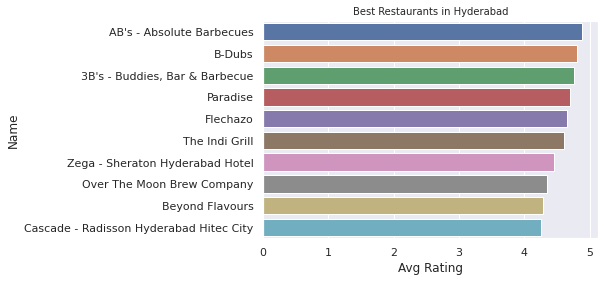

In [64]:
#visualizing the best restaurants 
sns.barplot(x='Avg Rating', y='Name',data=best_restaurants)
plt.title('Best Restaurants in Hyderabad',size=10)

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings in Hyderabad')

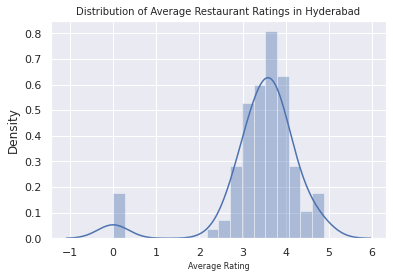

In [65]:
#distribution of Average Ratings in Hyderabad
sns.distplot(x=names_df['Avg Rating'])
plt.xlabel('Average Rating',size=8)
plt.title('Distribution of Average Restaurant Ratings in Hyderabad',size=10)

**Few restaurants in the original restaurant dataset have not been rated by the people yet, most restaurants have ratings between 3.5 and 4. Efforts should be made by the company to improve the existing restaurants by pushing them to act on the reviews and to include restaurants with better services in the future to improve overall rating distribution.**

####**The Most Popular Cuisines in Hyderabad**

In [66]:
#creating a new dataframe for the cuisines and number of restaurants providing them
#list of cuisines
cuisines1 = list(cuisine_dict.keys())
#creating a new dataframe
popular_cuisines = pd.DataFrame()
#creating a feature called cuisines and assigning unique cuisines as values
popular_cuisines['Cuisines'] = cuisines1
#creating a feature of sum of cuisines in the whole dataset
popular_cuisines['Total Restaurants'] = [names_df[i].sum() for i in cuisines1]
#sort values
popular_cuisines.sort_values('Total Restaurants',ascending=False,inplace=True,ignore_index=True)
popular_cuisines

,Cuisines,Total Restaurants
0,North Indian,64
1,Chinese,45
2,Continental,39
3,Hyderabadi,18
4,Fast Food,17
5,Italian,15
6,Asian,15
7,Desserts,14
8,Mughlai,13
9,South Indian,9


Text(0.5, 1.0, 'The Most Popular Cuisines in Hyderabad')

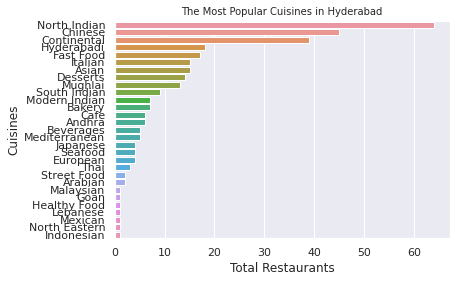

In [67]:
#visualizing cuisines
sns.barplot(x='Total Restaurants', y='Cuisines',data=popular_cuisines)
plt.title('The Most Popular Cuisines in Hyderabad',size=10)

**Although located in South India, North Indian food is dominating in the restaurants followed by Chinese, and Continental. The number of cuisines shows the diverse food options available in Hyderabad.**

####**Restaurants and their Costs**

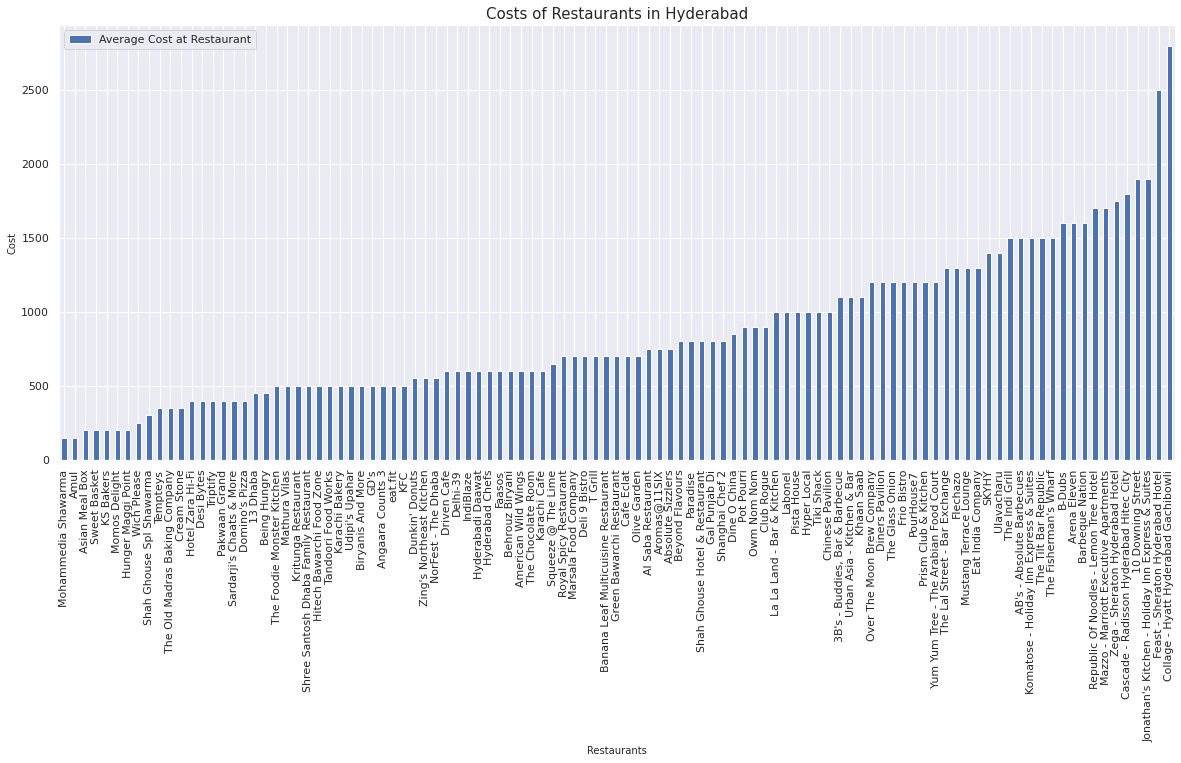

In [68]:
#visualizing Restaurant Costs
names_df.sort_values(['Cost']).plot(x="Name", y=["Cost"], kind="bar", figsize=(20, 8))
plt.xlabel('Restaurants',size=10)
plt.ylabel('Cost',size=10)
plt.title('Costs of Restaurants in Hyderabad',size=15)
plt.legend(['Average Cost at Restaurant'])

In [69]:
#top 5 cheapest restaurants
names_df[['Name','Cost']].sort_values(['Cost']).head()

,Name,Cost
89,Mohammedia Shawarma,150.0
23,Amul,150.0
54,Asian Meal Box,200.0
101,Sweet Basket,200.0
59,KS Bakers,200.0


## **The cheapest restaurants in the dataset are basically small food joints and bakeries.**

In [70]:
#top 5 costliest restaurants
names_df[['Name','Cost']].sort_values(['Cost'],ascending=False).head()

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800.0
56,Feast - Sheraton Hyderabad Hotel,2500.0
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
18,10 Downing Street,1900.0
91,Cascade - Radisson Hyderabad Hitec City,1800.0


## **The most expensive restaurants in the dataset are restaurants by 4 star above hotels.**

Text(0.5, 1.0, 'Distribution of Restaurant Costs in Hyderabad')

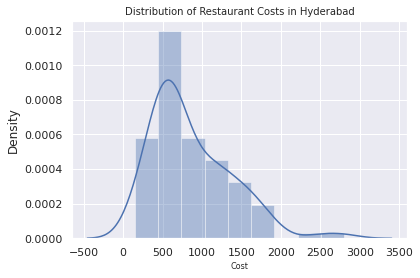

In [71]:
#distribution of Cost in Hyderabad
sns.distplot(x=names_df['Cost'])
plt.xlabel('Cost',size=8)
plt.title('Distribution of Restaurant Costs in Hyderabad',size=10)